In [181]:
import pandas as pd
import numpy as np
import seaborn as sns

In [182]:
path= 'C:/Users/USER/Desktop/dataset/deepL/open_data/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test_x.csv')

In [183]:
print(train.shape)
print(test.shape)

(45532, 78)
(11383, 77)


In [184]:
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True) # train에서 voted 제외하고

In [185]:
data

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,...,1,1,0,1,1,0,1,0,1,1
56911,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,...,1,1,1,1,1,1,1,1,1,1
56912,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,...,1,1,0,1,1,0,1,0,1,1
56913,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,...,1,0,0,1,1,0,1,1,1,0


In [186]:
# 개인 정보 columns data
personal_cols =['age_group','education','engnat','familysize','gender','hand','married','race','religion','urban']
Personal_info = data[personal_cols].copy()

In [187]:
Personal_info.hand.unique() #1,2,3,0

array([1, 2, 3, 0], dtype=int64)

In [188]:
# 1 : R / 2: L / 3: B
Personal_info.hand.value_counts() # 결측치 0 >> 201개

1    48876
2     5847
3     1991
0      201
Name: hand, dtype: int64

In [189]:
Personal_info

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban
0,30s,2,1,4,Female,1,3,White,Other,1
1,20s,4,2,3,Female,1,1,Asian,Hindu,3
2,30s,3,1,3,Male,1,2,White,Other,2
3,20s,4,2,0,Female,1,1,Asian,Hindu,3
4,20s,3,1,2,Male,1,2,White,Agnostic,1
...,...,...,...,...,...,...,...,...,...,...
56910,20s,3,2,3,Female,1,1,Other,Christian_Catholic,0
56911,10s,2,2,1,Female,1,1,Asian,Agnostic,2
56912,30s,4,1,4,Male,1,2,White,Atheist,1
56913,40s,2,1,3,Female,1,2,White,Atheist,2


[Text(0, 0, 'Right'),
 Text(0, 0, 'Left'),
 Text(0, 0, 'Both'),
 Text(0, 0, 'None')]

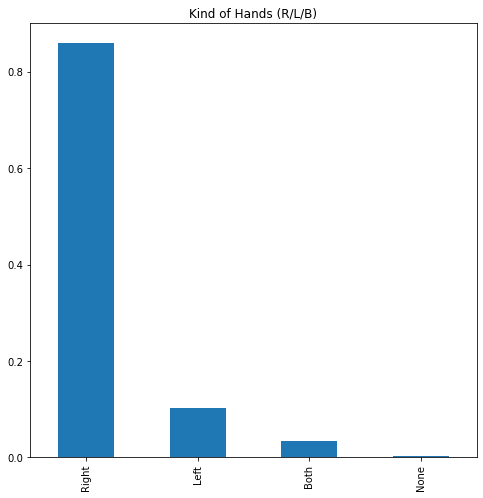

In [190]:
ax2 = Personal_info.hand.value_counts(normalize=True).plot(kind='bar',
                                                         figsize=(8,8),
                                                         title='Kind of Hands (R/L/B)')
ax2.set_xticklabels(['Right','Left','Both','None'])

In [191]:
no_hand=Personal_info[Personal_info['hand']==0]
no_hand=pd.DataFrame(no_hand)
no_hand=no_hand.drop("hand", axis=1)
no_hand

,age_group,education,engnat,familysize,gender,married,race,religion,urban
98,30s,4,1,2,Female,2,White,Other,3
195,40s,2,2,5,Male,1,Asian,Atheist,2
201,20s,2,1,3,Male,1,White,Atheist,2
746,10s,1,1,4,Female,0,Black,Christian_Other,3
1162,10s,2,1,2,Male,1,White,Atheist,3
...,...,...,...,...,...,...,...,...,...
55727,10s,1,1,3,Male,1,White,Christian_Protestant,2
55923,10s,2,2,2,Male,1,Black,Agnostic,3
55994,20s,4,1,2,Male,1,Black,Christian_Protestant,2
56287,20s,3,1,3,Male,1,White,Christian_Other,3


In [192]:
hand=Personal_info[Personal_info['hand']!=0]
hand=pd.DataFrame(hand)

In [193]:
hand

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban
0,30s,2,1,4,Female,1,3,White,Other,1
1,20s,4,2,3,Female,1,1,Asian,Hindu,3
2,30s,3,1,3,Male,1,2,White,Other,2
3,20s,4,2,0,Female,1,1,Asian,Hindu,3
4,20s,3,1,2,Male,1,2,White,Agnostic,1
...,...,...,...,...,...,...,...,...,...,...
56910,20s,3,2,3,Female,1,1,Other,Christian_Catholic,0
56911,10s,2,2,1,Female,1,1,Asian,Agnostic,2
56912,30s,4,1,4,Male,1,2,White,Atheist,1
56913,40s,2,1,3,Female,1,2,White,Atheist,2


In [194]:
no_hand

,age_group,education,engnat,familysize,gender,married,race,religion,urban
98,30s,4,1,2,Female,2,White,Other,3
195,40s,2,2,5,Male,1,Asian,Atheist,2
201,20s,2,1,3,Male,1,White,Atheist,2
746,10s,1,1,4,Female,0,Black,Christian_Other,3
1162,10s,2,1,2,Male,1,White,Atheist,3
...,...,...,...,...,...,...,...,...,...
55727,10s,1,1,3,Male,1,White,Christian_Protestant,2
55923,10s,2,2,2,Male,1,Black,Agnostic,3
55994,20s,4,1,2,Male,1,Black,Christian_Protestant,2
56287,20s,3,1,3,Male,1,White,Christian_Other,3


In [195]:
data.groupby(['race'])['hand'].value_counts(normalize=True).unstack()

hand,0,1,2,3
race,,,,
Arab,NaN,0.882488,0.085253,0.032258
Asian,0.004942,0.893034,0.076018,0.026006
Black,0.005176,0.860998,0.097227,0.036599
Indigenous Australian,NaN,0.796875,0.109375,0.093750
Native American,0.004511,0.793985,0.108271,0.093233
Other,0.003715,0.853613,0.092142,0.050529
White,0.003115,0.852806,0.110453,0.033626


In [199]:
data.hand.value_counts(normalize=True)

1    0.858754
2    0.102732
3    0.034982
0    0.003532
Name: hand, dtype: float64

In [251]:
hand_ratio = hand.hand.value_counts(normalize=True)
hand_ratio

1    0.861798
2    0.103096
3    0.035106
Name: hand, dtype: float64

In [256]:
no_hands_sampling = np.random.choice(range(1,4),201,p=hand_ratio) # hand 비율대로 확률 줘서 1,2,3 난수 추출

In [266]:
no_hand['hand'] = no_hands_sampling
no_hand

,age_group,education,engnat,familysize,gender,married,race,religion,urban,hand
98,30s,4,1,2,Female,2,White,Other,3,1
195,40s,2,2,5,Male,1,Asian,Atheist,2,1
201,20s,2,1,3,Male,1,White,Atheist,2,1
746,10s,1,1,4,Female,0,Black,Christian_Other,3,1
1162,10s,2,1,2,Male,1,White,Atheist,3,1
...,...,...,...,...,...,...,...,...,...,...
55727,10s,1,1,3,Male,1,White,Christian_Protestant,2,1
55923,10s,2,2,2,Male,1,Black,Agnostic,3,3
55994,20s,4,1,2,Male,1,Black,Christian_Protestant,2,1
56287,20s,3,1,3,Male,1,White,Christian_Other,3,2


In [278]:
fill_hand_data = pd.concat([no_hand,hand])

In [280]:
hand_data = fill_hand_data.sort_index()

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban
0,30s,2,1,4,Female,1,3,White,Other,1
1,20s,4,2,3,Female,1,1,Asian,Hindu,3
2,30s,3,1,3,Male,1,2,White,Other,2
3,20s,4,2,0,Female,1,1,Asian,Hindu,3
4,20s,3,1,2,Male,1,2,White,Agnostic,1
...,...,...,...,...,...,...,...,...,...,...
56910,20s,3,2,3,Female,1,1,Other,Christian_Catholic,0
56911,10s,2,2,1,Female,1,1,Asian,Agnostic,2
56912,30s,4,1,4,Male,1,2,White,Atheist,1
56913,40s,2,1,3,Female,1,2,White,Atheist,2
